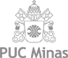
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 04_Interpretacao.ipynb

<B>Data:</B> 11/04/2022    
   
<a class="anchor" id="etapas"></a>
## Indice

1. [Interpretação Melhor Solução: K-Means](#arout)<br>
2. [Olist deve remover vendedores de baixo desempenho de seu mercado?](#limpa)<br>


In [25]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [26]:
%whos

Interactive namespace is empty.


In [17]:
#!pip install -U matplotlib --user
#Successfully installed matplotlib-3.5.1

  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime

from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

In [2]:
#versão necessária 3.5.1
print(matplotlib.__version__)

3.5.1


## <a class="anchor" id="arout">1. Interpretação Melhor Solução</a>
[Retorna ao Indice](#etapas)

In [3]:
df_abt = pd.read_excel(caminho_temp+'03_01_Modelos_K_Means_df_abt_kmeans_cluster.xlsx',index_col=0)
df_abt_kmeans = pd.read_excel(caminho_temp+'03_01_Modelos_K_Means_df_abt_sc_kmeans.xlsx', index_col=0)

In [4]:
df_abt.shape,df_abt_kmeans.shape

((1658, 115), (1658, 24))

In [ ]:
"""
#Escolhido p/ K_MEANS:UMAP c/ PowerTransformer
#inertia=1322.840631   
#silhoutte=0.534755     
#davies=0.543320        
#calinski=4540.193466   
#clusters=8

#Escolhido DBSCAN após testes: UMAP c/ PowerTransformer
#silhoutte=0.432606
#davies=0.454361
#calinski=1097.023785
#eps=0.4
#clusters=6
         
#Selecionado MeanShift após testes: UMAP c/ PowerTransformer
#silhoutte=0.559035
#davies=0.464891
#calinski=2464.37780
#quantile=0.127
#clusters=5

"""

In [ ]:
#Escolhido foi k-Means c/ PowerTransformer+UMAP, apesar de não levar vantagem em relação ao MeanShift nos quesitos silhoutte e davies.
#Ganha no score Calinski, além do que, serem 8 clusters.
#Mas como verificado em 03_01_Modelos_K_Means os clusters ficaram assim divididos:
#0    14.72
#1    10.92
#2    11.16
#3     3.92
#4    20.57
#5    21.59
#6    13.39
#7     3.74
#Já o MeanShift ficou assim(03_03_Modelos_MeanShift):
#0    51.09
#1    30.34
#2    10.92
#3     3.92
#4     3.74

In [11]:
df_abt_kmeans.select_dtypes(exclude=['int64','float64']).columns

Index(['vendedor_id', 'vendedor_cidade', 'vendedor_estado',
       'vendedor_grande_regiao_nome', 'plano', 'produto_categoria_nome_moda'],
      dtype='object')

In [10]:
df_abt_kmeans.columns

Index(['vendedor_id', 'vendedor_cidade', 'vendedor_estado',
       'vendedor_grande_regiao_nome', 'plano',
       'distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
       'produto_categoria_nome_moda', 'produto_categoria_id_moda',
       'Area(km2)_mediana', 'habit_km2_mediana',
       'postagem_limiteparceiro_variacao_mediana',
       'postagem_limiteparceiro_dias_atraso_mediana',
       'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
       'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
       'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido', 'cluster'],
      dtype='object')

In [4]:

df_abt_kmeans.select_dtypes(['int64','float64']).columns

Index(['distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
       'produto_categoria_id_moda', 'Area(km2)_mediana', 'habit_km2_mediana',
       'postagem_limiteparceiro_variacao_mediana',
       'postagem_limiteparceiro_dias_atraso_mediana',
       'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
       'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
       'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido', 'cluster'],
      dtype='object')

In [7]:
%%time
df_teste_kruskal=mf.teste_kruskal(df_abt_kmeans,
                                'distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
                                'Area(km2)_mediana', 'habit_km2_mediana',
                                'postagem_limiteparceiro_variacao_mediana',
                                'postagem_limiteparceiro_dias_atraso_mediana',
                                'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
                                'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
                                'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido')

Wall time: 467 ms


In [8]:
df_teste_kruskal[df_teste_kruskal['p']>0.05]

,med_0,std_0,med_1,std_1,med_2,std_2,med_3,std_3,med_4,std_4,med_5,std_5,med_6,std_6,med_7,std_7,t,p
produto_peso_g_mediana,736.50,4396.48,750.00,2489.50,800.00,3052.37,1000.00,6782.97,837.50,3884.11,1100.00,4367.02,800.00,5435.41,725.00,2921.57,7.35,0.393136
Area(km2)_mediana,726.67,538.40,684.11,354.01,692.82,266.64,734.53,1177.01,727.93,884.15,794.57,1671.83,692.82,1865.13,692.82,523.05,3.07,0.878145
vlr_medio_pedido,119.54,152.84,121.87,100.25,120.90,126.53,132.85,185.34,124.98,184.44,136.30,214.17,109.42,217.35,129.79,156.09,8.29,0.307578


In [ ]:
#Recursos interessantes para a apresentação:

In [ ]:
#H0=A mediana das features são iguais nos clusters.
#Ha=A mediana das features NÃO são iguais nos clusters.

In [10]:
df_teste_kruskal[~(df_teste_kruskal['p']>0.05)]

,med_0,std_0,med_1,std_1,med_2,std_2,med_3,std_3,med_4,std_4,med_5,std_5,med_6,std_6,med_7,std_7,t,p
distancia_cliente_vendedor_mediana,420.75,333.56,436.21,254.53,412.10,234.05,396.94,519.36,461.26,357.03,495.79,629.29,467.24,561.70,515.72,531.71,38.74,0.000002
habit_km2_mediana,2129.67,2265.19,917.79,1560.33,1063.34,1377.62,812.86,2903.53,768.31,2011.04,1573.00,2437.79,1465.14,2858.18,843.44,1494.48,89.89,0.000000
postagem_limiteparceiro_variacao_mediana,-4.00,2.02,-4.00,1.75,-4.00,1.73,2.00,3.05,-4.00,2.96,1.00,12.35,-4.00,4.02,-4.00,1.86,256.21,0.000000
postagem_limiteparceiro_dias_atraso_mediana,0.00,0.31,0.00,0.00,0.00,0.00,2.00,2.66,0.00,0.00,3.00,11.10,0.00,0.00,0.00,0.00,1325.78,0.000000
entrega_estimado_dias_atraso_mediana,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,21.03,0.00,0.00,0.00,0.00,1656.12,0.000000
"PIB_percapita_(3285,11000]",0.00,0.16,1.00,5.62,1.00,3.75,0.00,0.45,0.00,0.09,0.00,0.24,0.00,0.11,1.00,2.36,1030.76,0.000000
qtd_mes_01,0.00,0.00,2.00,4.87,0.00,0.55,0.00,4.08,0.00,0.06,0.00,0.28,0.00,0.64,0.00,0.00,1414.15,0.000000
qtd_mes_02,0.00,0.10,3.00,7.46,1.00,3.86,0.00,0.97,0.00,0.84,0.00,0.24,0.00,0.66,0.00,0.36,753.95,0.000000
qtd_mes_04,0.00,0.10,2.00,10.23,3.00,5.72,0.00,0.45,0.00,0.81,0.00,0.39,0.00,0.20,0.00,0.43,1057.05,0.000000
qtd_mes_06,0.00,0.40,3.00,14.25,3.00,8.54,0.00,0.67,0.00,1.67,0.00,0.50,0.00,0.18,0.00,5.63,788.64,0.000000


In [ ]:
"""
As features:
-produto_peso_g_mediana
-Area(km2)_mediana
-vlr_medio_pedido
Como falha a Hipótese H0, estas features não são significativas para o modelo.
"""

In [41]:
df_abt_kmeans.var().sort_values(ascending=False)

produto_peso_g_mediana                         1.804318e+07
habit_km2_mediana                              5.066689e+06
Area(km2)_mediana                              1.147510e+06
lucro                                          1.065012e+06
distancia_cliente_vendedor_mediana             1.864502e+05
vlr_medio_pedido                               2.904588e+04
dias_entre_pedidos                             2.512773e+02
qtd_mes_12                                     1.124780e+02
produto_categoria_id_moda                      9.793161e+01
qtd_mes_06                                     4.208594e+01
entrega_estimado_dias_atraso_mediana           2.125638e+01
qtd_mes_04                                     2.057882e+01
postagem_limiteparceiro_variacao_mediana       1.838219e+01
qtd_mes_02                                     1.122941e+01
postagem_limiteparceiro_dias_atraso_mediana    7.469928e+00
PIB_percapita_(3285,11000]                     6.942888e+00
cluster                                 

In [270]:
features_todas=['distancia_cliente_vendedor_mediana', 'produto_categoria_id_moda', 'habit_km2_mediana',
                'postagem_limiteparceiro_variacao_mediana', 'postagem_limiteparceiro_dias_atraso_mediana',
                'entrega_estimado_dias_atraso_mediana','PIB_percapita_(3285,11000]','qtd_mes_01','qtd_mes_02',
                'qtd_mes_04','qtd_mes_06','qtd_mes_12','lucro','dias_entre_pedidos']

features_cluster=['cluster']
features_relevantes_moda=['produto_categoria_id_moda']
features_relevantes_mediana=['habit_km2_mediana','distancia_cliente_vendedor_mediana','entrega_estimado_dias_atraso_mediana']
features_relevantes=['lucro','dias_entre_pedidos','qtd_mes_04','qtd_mes_06','qtd_mes_12']
features_moda=['produto_categoria_id_moda']
features_moda2=['vendedor_cidade', 'vendedor_estado','vendedor_grande_regiao_nome', 'plano', 'produto_categoria_nome_moda']
subcabecalho=['Lucro','Dias entre pedidos','Pedidos em Abril','Pedidos em Junho','Pedidos em Dezembro']
subcabecalho2=['Habitantes por km2','Distância entre cliente e vendedor','Dias de Atraso entre entrega e data estimada']
subcabecalho3=['Cidade do Vendedor','Estado do Vendedor','Região do Vendedor','Plano da Olist','Categorias dos Produtos']
features_moda=['produto_categoria_id_moda']
  


In [304]:
sumario = {}

for index in range(8):
    sumario[index] = df_abt_kmeans[df_abt_kmeans['cluster'] == index]['lucro'].describe().T  

In [305]:
sumario[0]


count     366.000000
mean     -160.688005
std       243.493687
min     -1336.380000
25%      -256.785000
50%      -182.950000
75%      -113.267500
max      2248.800000
Name: lucro, dtype: float64

In [294]:
sumario[0]

count     366.000000
mean     -160.688005
std       243.493687
min     -1336.380000
25%      -256.785000
50%      -182.950000
75%      -113.267500
max      2248.800000
Name: lucro, dtype: float64

In [306]:
display(sumario[0],sumario[1],sumario[2],sumario[3],sumario[4],sumario[5],sumario[6],sumario[7])

count     366.000000
mean     -160.688005
std       243.493687
min     -1336.380000
25%      -256.785000
50%      -182.950000
75%      -113.267500
max      2248.800000
Name: lucro, dtype: float64

count      181.000000
mean       962.945193
std       2225.628443
min       -596.430000
25%       -159.740000
50%        224.930000
75%       1426.680000
max      19108.440000
Name: lucro, dtype: float64

count     210.000000
mean      506.671714
std       964.647051
min      -785.190000
25%      -179.790000
50%       143.240000
75%       972.767500
max      4806.500000
Name: lucro, dtype: float64

count     62.000000
mean    -106.641935
std      115.467252
min     -452.460000
25%     -144.472500
50%     -104.640000
75%      -85.420000
max      354.380000
Name: lucro, dtype: float64

count     246.000000
mean      -53.746870
std       289.562665
min      -530.240000
25%      -178.055000
50%      -120.015000
75%       -23.535000
max      2835.290000
Name: lucro, dtype: float64

count     65.000000
mean    -127.559231
std       78.300261
min     -323.280000
25%     -156.170000
50%     -134.870000
75%     -103.640000
max      150.620000
Name: lucro, dtype: float64

count     343.000000
mean      -96.713673
std       135.757594
min      -360.740000
25%      -130.740000
50%      -103.970000
75%       -92.360000
max      1958.580000
Name: lucro, dtype: float64

count      185.000000
mean       165.604595
std       1490.983093
min       -552.660000
25%       -264.980000
50%       -145.910000
75%         66.970000
max      15396.170000
Name: lucro, dtype: float64

count     366.000000
mean     -160.688005
std       243.493687
min     -1336.380000
25%      -256.785000
50%      -182.950000
75%      -113.267500
max      2248.800000
Name: lucro, dtype: float64

count      181.000000
mean       962.945193
std       2225.628443
min       -596.430000
25%       -159.740000
50%        224.930000
75%       1426.680000
max      19108.440000
Name: lucro, dtype: float64

count     210.000000
mean      506.671714
std       964.647051
min      -785.190000
25%      -179.790000
50%       143.240000
75%       972.767500
max      4806.500000
Name: lucro, dtype: float64

count     62.000000
mean    -106.641935
std      115.467252
min     -452.460000
25%     -144.472500
50%     -104.640000
75%      -85.420000
max      354.380000
Name: lucro, dtype: float64

count     246.000000
mean      -53.746870
std       289.562665
min      -530.240000
25%      -178.055000
50%      -120.015000
75%       -23.535000
max      2835.290000
Name: lucro, dtype: float64

count     65.000000
mean    -127.559231
std       78.300261
min     -323.280000
25%     -156.170000
50%     -134.870000
75%     -103.640000
max      150.620000
Name: lucro, dtype: float64

count     343.000000
mean      -96.713673
std       135.757594
min      -360.740000
25%      -130.740000
50%      -103.970000
75%       -92.360000
max      1958.580000
Name: lucro, dtype: float64

count      185.000000
mean       165.604595
std       1490.983093
min       -552.660000
25%       -264.980000
50%       -145.910000
75%         66.970000
max      15396.170000
Name: lucro, dtype: float64

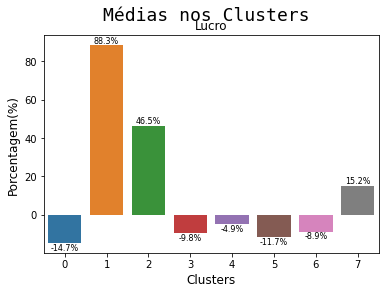

count    366.000000
mean      14.431694
std       13.532487
min        1.000000
25%        6.000000
50%       10.000000
75%       18.000000
max      106.000000
Name: dias_entre_pedidos, dtype: float64

count    181.000000
mean      11.497238
std       12.465341
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       93.000000
Name: dias_entre_pedidos, dtype: float64

count    210.000000
mean      10.976190
std        9.300636
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       50.000000
Name: dias_entre_pedidos, dtype: float64

count     62.000000
mean      13.193548
std       21.723930
min        1.000000
25%        1.000000
50%        2.000000
75%       19.000000
max      104.000000
Name: dias_entre_pedidos, dtype: float64

count    246.000000
mean      29.138211
std       20.952356
min        2.000000
25%       14.250000
50%       23.000000
75%       37.750000
max      128.000000
Name: dias_entre_pedidos, dtype: float64

count    65.000000
mean     10.276923
std      20.159139
min       1.000000
25%       1.000000
50%       1.000000
75%       7.000000
max      98.000000
Name: dias_entre_pedidos, dtype: float64

count    343.000000
mean       2.326531
std        5.470128
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       90.000000
Name: dias_entre_pedidos, dtype: float64

count    185.000000
mean      11.545946
std       11.634343
min        1.000000
25%        4.000000
50%        7.000000
75%       14.000000
max       63.000000
Name: dias_entre_pedidos, dtype: float64

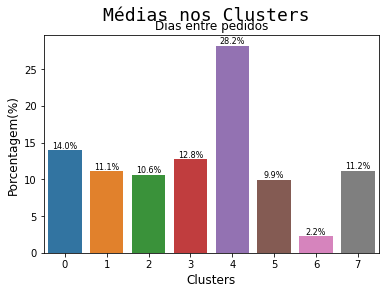

count    366.000000
mean       0.010929
std        0.104111
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: qtd_mes_04, dtype: float64

count    181.000000
mean       6.077348
std       10.234179
min        0.000000
25%        0.000000
50%        2.000000
75%        7.000000
max       73.000000
Name: qtd_mes_04, dtype: float64

count    210.000000
mean       4.600000
std        5.723451
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       39.000000
Name: qtd_mes_04, dtype: float64

count    62.000000
mean      0.209677
std       0.448571
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: qtd_mes_04, dtype: float64

count    246.000000
mean       0.455285
std        0.810664
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: qtd_mes_04, dtype: float64

count    65.000000
mean      0.138462
std       0.390389
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: qtd_mes_04, dtype: float64

count    343.000000
mean       0.034985
std        0.199269
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: qtd_mes_04, dtype: float64

count    185.000000
mean       0.118919
std        0.425950
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: qtd_mes_04, dtype: float64

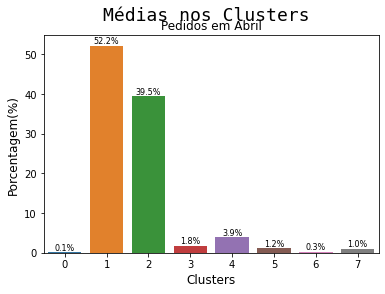

count    366.000000
mean       0.054645
std        0.401733
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: qtd_mes_06, dtype: float64

count    181.000000
mean       7.204420
std       14.249257
min        0.000000
25%        0.000000
50%        3.000000
75%        8.000000
max       99.000000
Name: qtd_mes_06, dtype: float64

count    210.000000
mean       5.757143
std        8.543896
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       58.000000
Name: qtd_mes_06, dtype: float64

count    62.000000
mean      0.145161
std       0.673790
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       5.000000
Name: qtd_mes_06, dtype: float64

count    246.000000
mean       0.934959
std        1.672050
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       13.000000
Name: qtd_mes_06, dtype: float64

count    65.000000
mean      0.138462
std       0.496139
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       3.000000
Name: qtd_mes_06, dtype: float64

count    343.000000
mean       0.034985
std        0.184011
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: qtd_mes_06, dtype: float64

count    185.000000
mean       1.551351
std        5.631705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       61.000000
Name: qtd_mes_06, dtype: float64

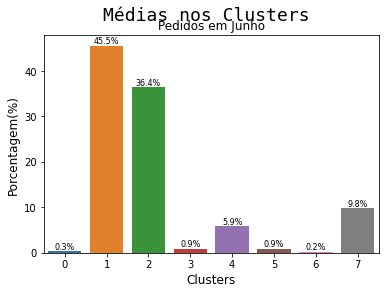

count    366.000000
mean       3.153005
std        5.852861
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       86.000000
Name: qtd_mes_12, dtype: float64

count    181.000000
mean       6.447514
std       17.009271
min        0.000000
25%        0.000000
50%        1.000000
75%        7.000000
max      174.000000
Name: qtd_mes_12, dtype: float64

count    210.000000
mean       7.100000
std       18.240931
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max      129.000000
Name: qtd_mes_12, dtype: float64

count    62.000000
mean      0.580645
std       2.956229
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      23.000000
Name: qtd_mes_12, dtype: float64

count    246.000000
mean       0.678862
std        1.911971
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       19.000000
Name: qtd_mes_12, dtype: float64

count    65.000000
mean      0.184615
std       0.464095
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: qtd_mes_12, dtype: float64

count    343.000000
mean       0.192420
std        0.487566
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: qtd_mes_12, dtype: float64

count    185.000000
mean       6.972973
std       14.240723
min        0.000000
25%        0.000000
50%        2.000000
75%        7.000000
max      134.000000
Name: qtd_mes_12, dtype: float64

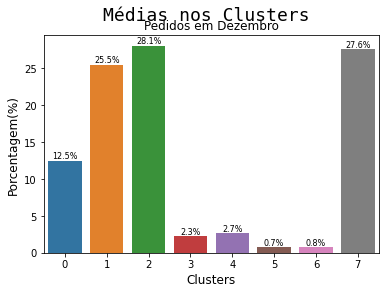

In [307]:
features=features_relevantes+features_cluster
describe_clusters = df_abt_kmeans[features].groupby('cluster').mean()
describe_clusters_2= round(describe_clusters/describe_clusters.sum()*100,2).reset_index()
l=0
for i in features_relevantes:
    sumario = {}

    for index in range(8):
        sumario[index] = df_abt_kmeans[df_abt_kmeans['cluster'] == index][i].describe().T  
    display(sumario[0],sumario[1],sumario[2],sumario[3],sumario[4],sumario[5],sumario[6],sumario[7])
    ax=sns.barplot(x = describe_clusters_2.index, y = i,  data = describe_clusters_2)  
    ax.set_xlabel('Clusters', fontsize = 12)
    ax.set_ylabel("Porcentagem(%)", fontsize = 12)

    plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%')   
    plt.title(subcabecalho[l])
    l+=1
    plt.suptitle('Médias nos Clusters', fontsize = 18, fontname = 'monospace')
    plt.show()


count     366.000000
mean     2810.772883
std      2265.185549
min        78.120000
25%       949.650000
50%      2129.667500
75%      4247.106250
max      8343.070000
Name: habit_km2_mediana, dtype: float64

count     181.000000
mean     1506.135028
std      1560.325482
min        35.420000
25%       525.860000
50%       917.790000
75%      1883.050000
max      8151.170000
Name: habit_km2_mediana, dtype: float64

count     210.000000
mean     1533.978119
std      1377.624504
min        56.570000
25%       612.785000
50%      1063.342500
75%      1985.372500
max      7959.270000
Name: habit_km2_mediana, dtype: float64

count       62.000000
mean      2514.864516
std       2903.533926
min         15.510000
25%        269.412500
50%        812.860000
75%       4232.065000
max      11479.970000
Name: habit_km2_mediana, dtype: float64

count     246.000000
mean     1743.690325
std      2011.044580
min        14.905000
25%       277.882500
50%       768.312500
75%      2724.891250
max      7959.270000
Name: habit_km2_mediana, dtype: float64

count      65.000000
mean     2561.295385
std      2437.790387
min         1.210000
25%       512.450000
50%      1573.000000
75%      4263.730000
max      7959.270000
Name: habit_km2_mediana, dtype: float64

count      343.000000
mean      2691.535452
std       2858.176653
min          0.790000
25%        237.785000
50%       1465.140000
75%       4386.670000
max      10744.310000
Name: habit_km2_mediana, dtype: float64

count     185.000000
mean     1335.393162
std      1494.483460
min        15.775000
25%       415.015000
50%       843.435000
75%      1546.940000
max      7959.270000
Name: habit_km2_mediana, dtype: float64

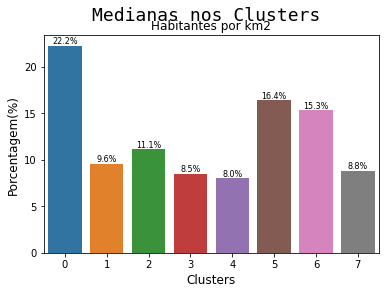

count     366.000000
mean      468.277348
std       333.562954
min         2.396000
25%       284.959375
50%       420.745250
75%       598.178875
max      2976.892000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     181.000000
mean      498.260586
std       254.533760
min        63.628000
25%       347.690000
50%       436.214000
75%       569.859000
max      1567.722000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     210.00000
mean      462.41535
std       234.05493
min        24.24100
25%       344.70075
50%       412.10250
75%       545.85325
max      2229.33050
Name: distancia_cliente_vendedor_mediana, dtype: float64

count      62.000000
mean      551.542806
std       519.361520
min         4.167000
25%       260.818125
50%       396.939750
75%       642.815500
max      2231.294000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     246.000000
mean      549.726407
std       357.030064
min        13.986500
25%       321.165000
50%       461.258500
75%       722.913125
max      2400.492000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count      65.000000
mean      730.945215
std       629.292343
min        30.938000
25%       334.417000
50%       495.790000
75%       910.142000
max      2774.847000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     343.000000
mean      602.976717
std       561.695959
min         1.057000
25%       241.433500
50%       467.243500
75%       750.162500
max      3016.675000
Name: distancia_cliente_vendedor_mediana, dtype: float64

count     185.0000
mean      708.4578
std       531.7140
min        36.5830
25%       389.2200
50%       515.7240
75%       805.5490
max      2838.2160
Name: distancia_cliente_vendedor_mediana, dtype: float64

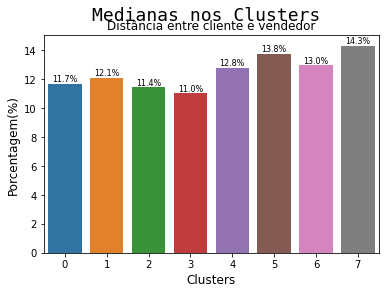

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    181.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    210.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    62.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    246.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count     65.000000
mean      10.523077
std       21.030564
min        1.000000
25%        3.000000
50%        6.000000
75%       12.000000
max      167.000000
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    343.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

count    185.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: entrega_estimado_dias_atraso_mediana, dtype: float64

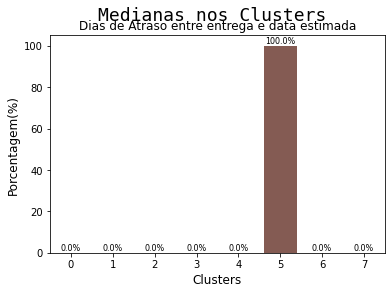

In [308]:
features=features_relevantes_mediana+features_cluster
describe_clusters = df_abt_kmeans[features].groupby('cluster').median()
describe_clusters_2= round(describe_clusters/describe_clusters.sum()*100,2).reset_index()
l=0
for i in features_relevantes_mediana:
    sumario = {}

    for index in range(8):
        sumario[index] = df_abt_kmeans[df_abt_kmeans['cluster'] == index][i].describe().T  
    display(sumario[0],sumario[1],sumario[2],sumario[3],sumario[4],sumario[5],sumario[6],sumario[7])
 
    ax=sns.barplot(x = describe_clusters_2.index, y = i,  data = describe_clusters_2)
    ax.set_xlabel('Clusters', fontsize = 12)
    ax.set_ylabel("Porcentagem(%)", fontsize = 12)

    plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%') 
    plt.title(subcabecalho2[l])
    l+=1
    plt.suptitle('Medianas nos Clusters', fontsize = 18, fontname = 'monospace')
    plt.show()


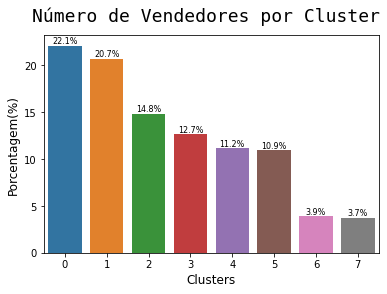

In [79]:
#Numero de vendedores por clusters
df_vend=round(df_abt_kmeans['cluster'].value_counts(normalize=True)*100,2)
df_vend=df_vend.reset_index()
ax=sns.barplot(x = df_vend.index, y = 'cluster',  data = df_vend)  
ax.set_xlabel('Clusters', fontsize = 12)
ax.set_ylabel("Porcentagem(%)", fontsize = 12)

plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%')   
plt.suptitle('Número de Vendedores por Cluster', fontsize = 18, fontname = 'monospace')

plt.show()


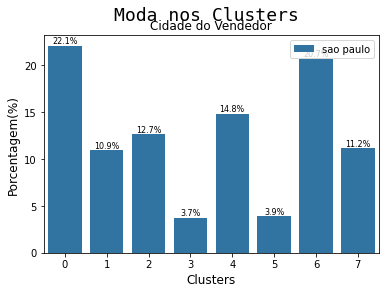

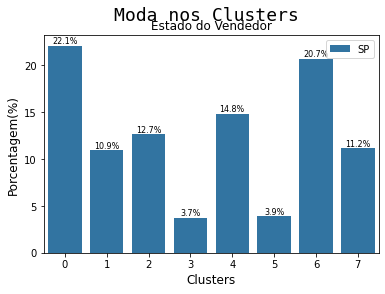

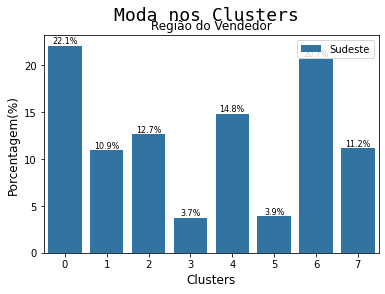

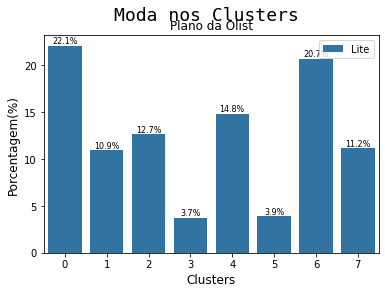

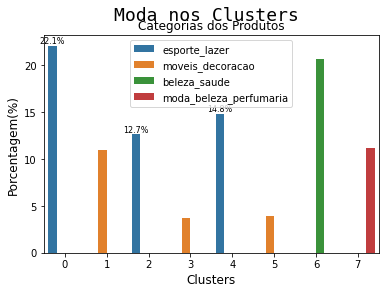

In [269]:
df_aux=pd.DataFrame(df_abt_kmeans.groupby('cluster').agg({'plano':pd.Series.mode,'vendedor_id':'count'})).reset_index()
df_aux2=round(df_aux['vendedor_id']/df_aux['vendedor_id'].sum()*100,2).reset_index()
df_aux2.rename(columns={'vendedor_id': 'porcentagem','index':'cluster'},inplace=True)
df_aux3=df_aux.merge(right=df_aux2,left_on=['cluster'], right_on=['cluster'], how='inner')

l=0

for i in features_moda2:
    df_aux=pd.DataFrame(df_abt_kmeans.groupby('cluster').agg({i:pd.Series.mode,'vendedor_id':'count'})).reset_index()
    df_aux2=round(df_aux['vendedor_id']/df_aux['vendedor_id'].sum()*100,2).reset_index()
    df_aux2.rename(columns={'vendedor_id': 'porcentagem','index':'cluster'},inplace=True)
    df_aux3=df_aux.merge(right=df_aux2,left_on=['cluster'], right_on=['cluster'], how='inner')

    ax=sns.barplot(x = df_aux3.index, y = 'porcentagem',hue=i, data = df_aux3)
    ax.set_xlabel('Clusters', fontsize = 12)
    ax.set_ylabel("Porcentagem(%)", fontsize = 12)

    plt.bar_label(ax.containers[0],size=8,fmt='%.1f%%') 
    plt.title(subcabecalho3[l])
    l+=1
    plt.legend(loc = "best")
    plt.suptitle('Moda nos Clusters', fontsize = 18, fontname = 'monospace')
    plt.show()


## <a class="anchor" id="limpa">2. Olist deve remover vendedores de baixo desempenho de seu mercado?</a>
[Retorna ao Indice](#etapas)

In [ ]:
#olist-105
"""
Receitas
A Olist tem um desconto de 10% no preço do produto (excl. frete) de cada pedido entregue.
A Olist cobra R$ 80 por mês por vendedor.

Custo
A longo prazo, a má experiência do cliente tem implicações nos negócios: baixa taxa de repetição, 
    custo imediato de suporte ao cliente, reembolsos ou comunicação boca a boca desfavorável. 
    Vamos supor que temos uma medida estimada do custo monetário para cada revisão ruim:

a review score of 1 star costs 100 BRL
a review score of 2 stars costs 50 BRL
a review score of 3 stars costs 40 BRL
review scores of 4 or 5 stars aren't associated with additional costs

Além disso, os custos de TI da Olist (servidores, etc...) aumentam com a quantidade de pedidos processados, 
embora cada vez menos rapidamente (efeitos de escala). Por uma questão de simplicidade, consideraremos os 
custos totais acumulados de TI da Olist como sendo proporcionais à raiz quadrada do número total acumulado de 
pedidos aprovados. O departamento de TI também informou que desde o nascimento do mercado, os custos acumulados 
de TI somaram R$ 500.000.

A Olist deve remover vendedores com baixo desempenho de seu mercado?

Para analisar o impacto da remoção dos piores vendedores do mercado da Olist, podemos começar com uma análise hipotética:
    O que teria acontecido se a Olist nunca tivesse aceitado esses vendedores em primeiro lugar? Por isso:
        
Etapa 1: calcule, para cada seller_id, e cumule desde o início:
        The revenues it brings
        The costs associated with all its bad reviews
        The resulting profits (revenues - costs)
        The number of orders (it will impact overall IT costs)
        
Etapa 2: podemos classificar os vendedores aumentando os lucros para o Olist e, para cada número de vendedores a serem 
    removidos, calcular o impacto financeiro que teria causado se eles nunca tivessem sido aceitos na plataforma.
    Podemos encontrar um número ideal de vendedores para remover que maximize a margem de lucro da Olist.
    
"""   

In [ ]:
"""
OLIST/105
A Olist deve remover vendedores com baixo desempenho de seu mercado?
Para analisar o impacto da remoção dos piores vendedores do mercado da Olist, podemos começar com uma análise hipotética:
O que teria acontecido se a Olist nunca tivesse aceitado esses vendedores em primeiro lugar? Por isso:

Etapa 1: 
calcule, para cada seller_id, e cumule desde o início:
-As receitas que traz
-Os custos associados a todas as suas críticas negativas
-Os lucros resultantes (receitas - custos)
-O número de pedidos (isso afetará os custos gerais de TI)

Etapa 2: 
podemos classificar os vendedores aumentando os lucros para o Olist e, para cada número de vendedores a serem
removidos, calcular o impacto financeiro que teria causado se eles nunca tivessem sido aceitos na plataforma. 
Podemos encontrar um número ideal de vendedores para remover que maximize a margem de lucro da Olist.

Como o clustering é uma tarefa de aprendizado de máquina não supervisionada, a técnica de seleção de recursos mais ideal
é a técnica de limite de variação.
A técnica Variance Threshold de seleção de recursos é uma técnica de linha de base. Ele simplesmente remove todos os 
recursos com uma variação que não atende a um limite definido.
Existem colunas no dataframe int que são totalmente preenchidas com zeros. Eles têm o mesmo valor de zero em todas as 
linhas. Essas colunas não têm variância porque não há variabilidade pelas linhas, além disso, essas colunas de variância 
zero são redundantes e não podem contribuir em nada para o desempenho do modelo.
Usarei um limite definido em 0 para identificar e remover essas colunas.


"""

In [317]:
df_abt[['vendedor_id','lucro']][df_abt['lucro']>0].sort_values(by='lucro',ascending=False).head(100)

,vendedor_id,lucro
837,7e93a43ef30c4f03f38b393420bc753a,19108.44
548,53243585a1d6dc2643021fd1853d8905,15396.17
1619,fa1c13f2614d7b5c4749cbc52fecda94,12409.17
467,46dc3b2cc0980fb8ec44634e21d2718e,11007.82
476,4869f7a5dfa277a7dca6462dcf3b52b2,9538.71
811,7a67c85e85bb2ce8582c35f2203ad736,7382.95
640,620c87c171fb2a6dd6e8bb4dec959fc6,7088.82
1344,ccc4bbb5f32a6ab2b7066a4130f114e3,5517.09
609,5c243662ce92d84573bfaff24c3e3700,5162.72
371,37be5a7c751166fbc5f8ccba4119e043,5046.40


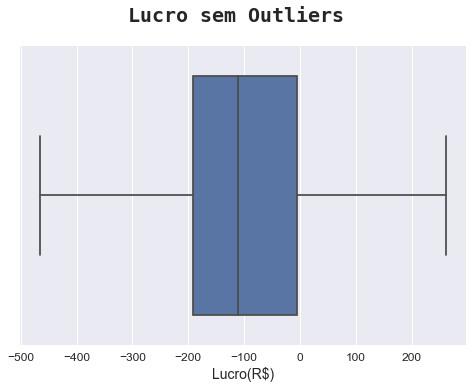

In [318]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt,showfliers=False)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.suptitle("Lucro sem Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

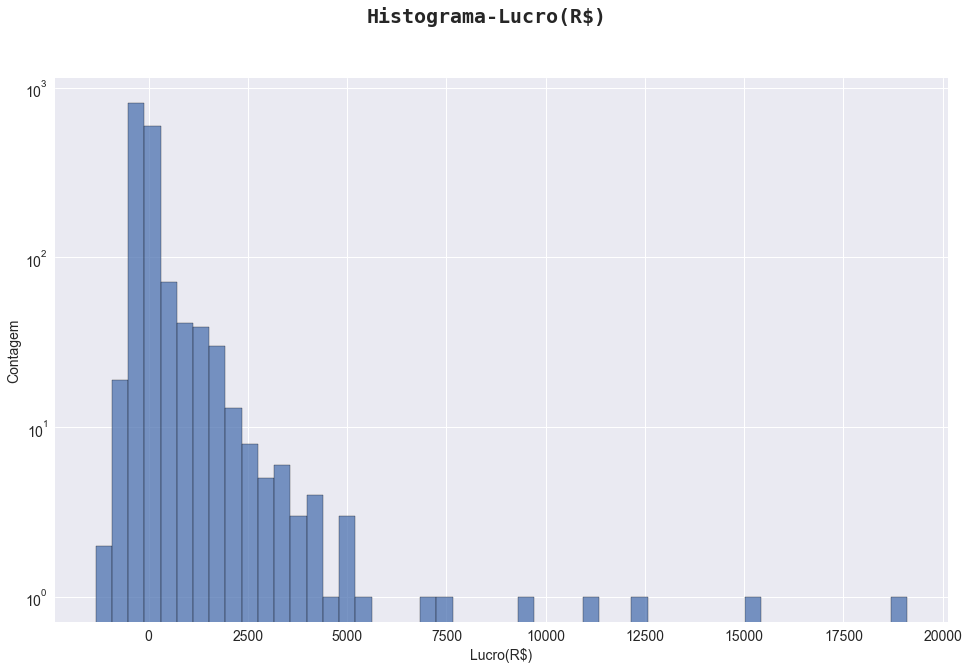

In [319]:
#lucro
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(df_abt["lucro"], bins=50, log_scale=(False, True), ax=ax)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.ylabel('Contagem',fontsize=14)

plt.suptitle("Histograma-Lucro(R$)", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()
#sns.histplot(df_abt["lucro"], bins=50, ax=ax)

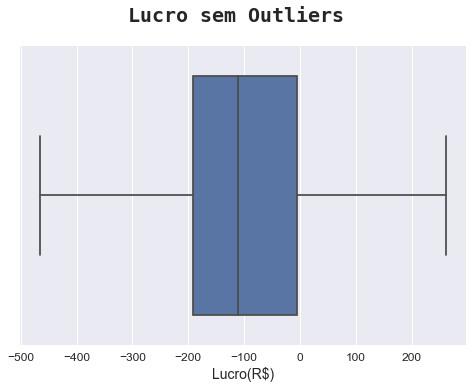

In [320]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt,showfliers=False)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.suptitle("Lucro sem Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

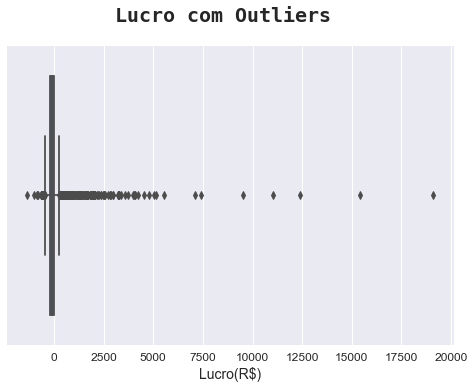

In [321]:
plt.style.use('seaborn')
sns.boxplot(x='lucro' , data= df_abt)
plt.tick_params(axis="x", labelsize=12)
plt.xlabel("Lucro(R$)",fontsize=14)
plt.suptitle("Lucro com Outliers", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

In [322]:
#Encontrou os vendedores menos lucrativos com base em avaliações negativas
df_abt[['receitas', 'custo_reviews', 'lucro']].sort_values(by='lucro', ignore_index= True).head(15)

,receitas,custo_reviews,lucro
0,1711.81,1370,-1336.38
1,1542.43,1075,-1002.32
2,932.76,440,-859.45
3,1714.90,1060,-845.02
4,8898.70,1635,-785.19
5,2645.39,840,-652.05
6,17422.93,5630,-642.44
7,656.74,240,-625.11
8,638.53,435,-596.86
9,741.84,230,-596.43


In [324]:
print(f"Número: - vendedores:  {df_abt['vendedor_id'].nunique()}")
print(f"        - pedidos:    {df_abt['qtd_pedidos'].sum()} ")
print(f"Lucro atual:   R$ {round(df_abt['lucro'].sum(), 2)}")

Número: - vendedores:  1658
        - pedidos:    42742 
Lucro atual:   R$ 191221.51


In [327]:
#contar os vendedores a remover
vendedores_removidos = []
#salve o lucro total depois de remover os vendedores
lista_lucro = []

df = df_abt.sort_values(by='lucro', ignore_index= True).copy(deep=True)

for i in range(len(df)):
    lista_lucro.append(mf.calcula_lucro_total(df[i:]) / 1000)
    vendedores_removidos.append(i)


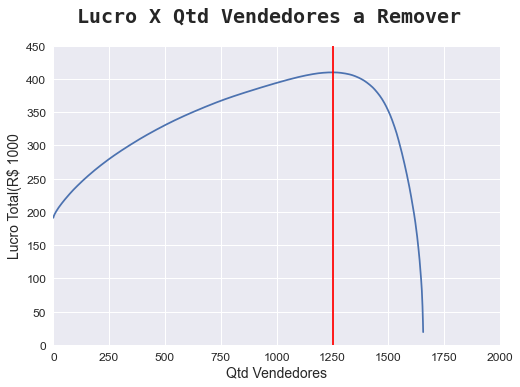

In [328]:
#Como o lucro muda quando deixamos de lado os vendedores menos lucrativos?
sns.lineplot(x = vendedores_removidos, y = lista_lucro)
plt.axvline(1252, 0, 1, color= 'red')
plt.xlabel("Qtd Vendedores",fontsize=14)
plt.ylabel('Lucro Total(R$ 1000',fontsize=14)
plt.xlim(0,2000)
plt.ylim(0,450)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.suptitle("Lucro X Qtd Vendedores a Remover", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show()

In [329]:
lucro_maximo = max(lista_lucro)
vendedores_cortados = lista_lucro.index(lucro_maximo)
lucro_maximo, vendedores_cortados

(410.02799, 1252)

In [331]:
#Número ideal de vendedores ruins para remover
novo_lucro = []
novo_adm_custos = []
novo_custo_reviews = []
nova_receita = []

nb_sellers_to_remove = 2000
for i in range(nb_sellers_to_remove):
    X = df_abt.sort_values(by="lucro", ascending=True).iloc[i:, :].copy()
    novo_lucro.append(X['lucro'].sum())
    novo_adm_custos.append(X['adm_custos'].sum())
    novo_custo_reviews.append(X['custo_reviews'].sum())
    nova_receita.append(X['receitas'].sum())
#np.argmax(novo_lucro),np.max(novo_lucro)

<function matplotlib.pyplot.show(close=None, block=None)>

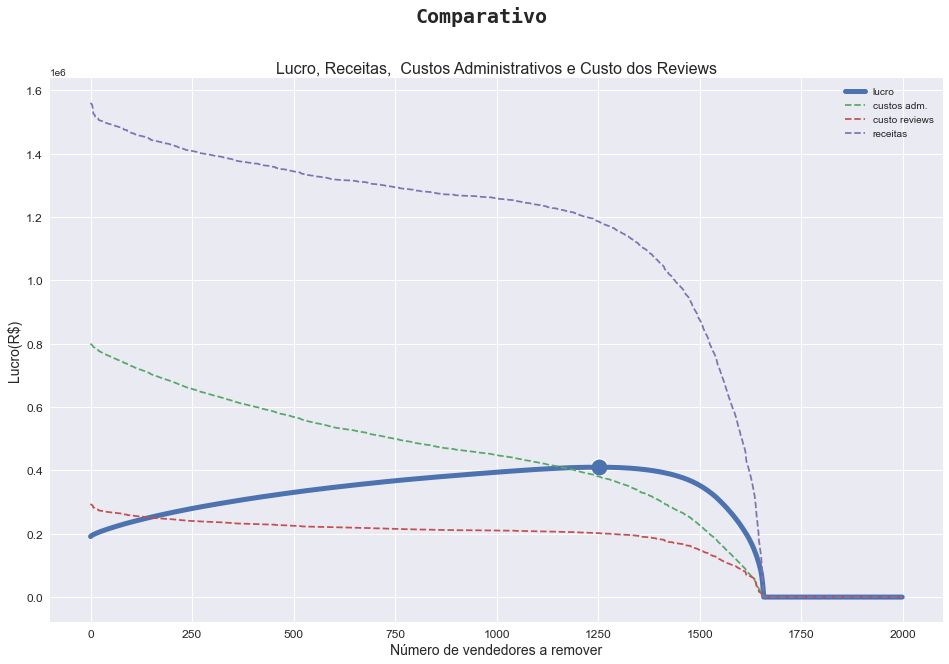

In [333]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.lineplot(x=range(nb_sellers_to_remove), y=novo_lucro, ax=ax, label="lucro", linewidth=5)
sns.lineplot(x=range(nb_sellers_to_remove), y=novo_adm_custos, ax=ax, label="custos adm.", linestyle="--")
sns.lineplot(x=range(nb_sellers_to_remove), y=novo_custo_reviews, ax=ax, label="custo reviews", linestyle="--")
sns.lineplot(x=range(nb_sellers_to_remove), y=nova_receita, ax=ax, label="receitas", linestyle="--")

sns.scatterplot(x=[np.argmax(novo_lucro)], y=[np.max(novo_lucro)], ax=ax, s=300)
# ax.axvline([np.argmax(new_profit)],color="black",linestyle="--")
ax.set_title("Lucro, Receitas,  Custos Administrativos e Custo dos Reviews", size=16)
ax.set_xlabel("Número de vendedores a remover",fontsize=14)
ax.set_ylabel("Lucro(R$)",fontsize=14)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.suptitle("Comparativo", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show

In [ ]:
#Ao remover vendedores, reduzimos os custos relacionados ao usuário enquanto perdemos o volume de pedidos e, 
#portanto, aumentamos os custos administrativos.

In [334]:
print('-----Redução do número de vendedores')
print(f"Número: - vendedores:        {df['vendedor_id'][1252:].count()}")
print(f"        - pedidos:         {df['qtd_pedidos'][1252:].sum()} ")
print(f"Lucro neste caso:   R$ {np.max(novo_lucro)}")
print(f"Ganho:                      {int(np.round((np.max(novo_lucro) - novo_lucro[0]) / novo_lucro[0] * 100))}%")

-----Redução do número de vendedores
Número: - vendedores:        406
        - pedidos:         30649 
Lucro neste caso:   R$ 410027.99
Ganho:                      114%


In [ ]:
"""
Ao remover os 483 vendedores menos lucrativos, podemos aumentar nossos lucros de 0,72 Mio BRL to 1,15 Mio BRL
Queremos encontrar uma maneira de maximizar nossa margem de lucro reduzindo os custos devidos aos nossos vendedores.
Principais componentes desses custos:

perda de receita devido à experiência negativa do comprador (comentários)
Custos administrativos para lidar com o volume de pedidos
"""

<function matplotlib.pyplot.show(close=None, block=None)>

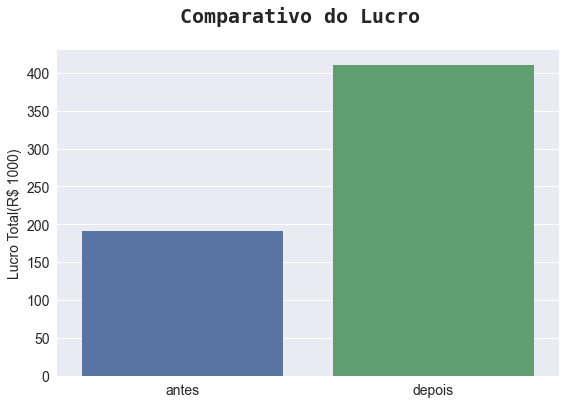

In [335]:
df= pd.DataFrame.from_dict({'antes': [191.22] , 'depois': [410.03]})
plt.figure(figsize=(9,6))
sns.barplot(data=df)
#plt.xlabel("Qtd Vendedores",fontsize=14)
plt.ylabel('Lucro Total(R$ 1000)',fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.suptitle("Comparativo do Lucro", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show

In [336]:
df_abt_vend=df_abt.copy(deep=True)

In [337]:
#Detecção dos maus vendedores
df_abt_vend["tipo_vendedor"] = "Bom"
df_abt_vend.sort_values(by="lucro", ascending=True, inplace=True)
df_abt_vend.loc[df_abt_vend.index[:np.argmax(novo_lucro)], "tipo_vendedor"] = "Mau"

<function matplotlib.pyplot.show(close=None, block=None)>

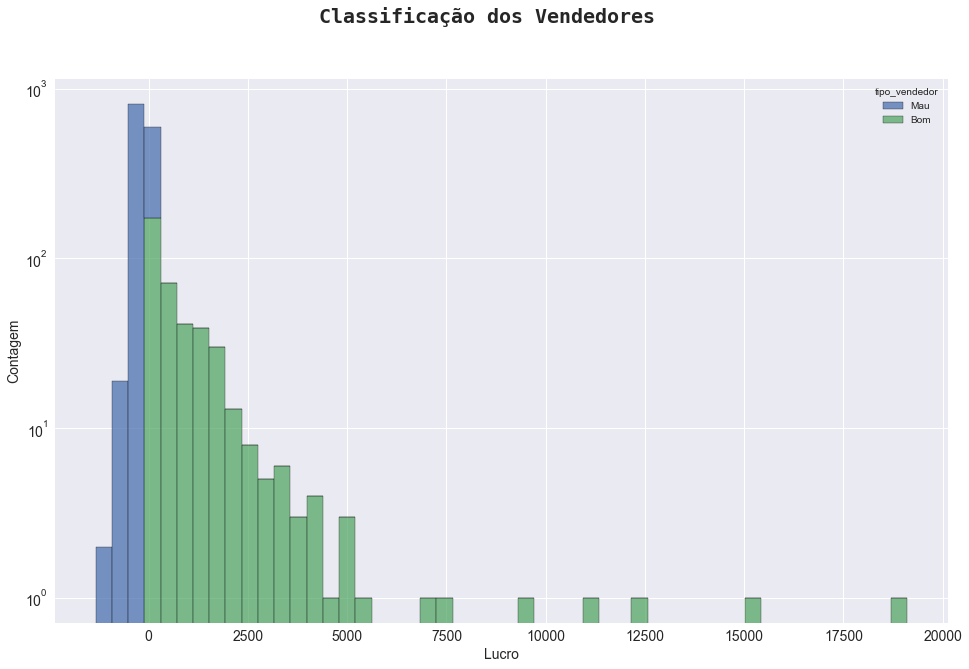

In [338]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(x='lucro', data=df_abt_vend, bins=50, hue="tipo_vendedor", log_scale=(False, True), ax=ax, multiple="stack")
plt.ylabel('Contagem',fontsize=14)
plt.xlabel('Lucro',fontsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.suptitle("Classificação dos Vendedores", fontsize = 20, fontname = 'monospace', weight = 'bold')
plt.show